In [2]:
import pandas as pd
housing = pd.read_csv("housing.csv")

In [3]:
housing.head(8)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<function matplotlib.pyplot.show(close=None, block=None)>

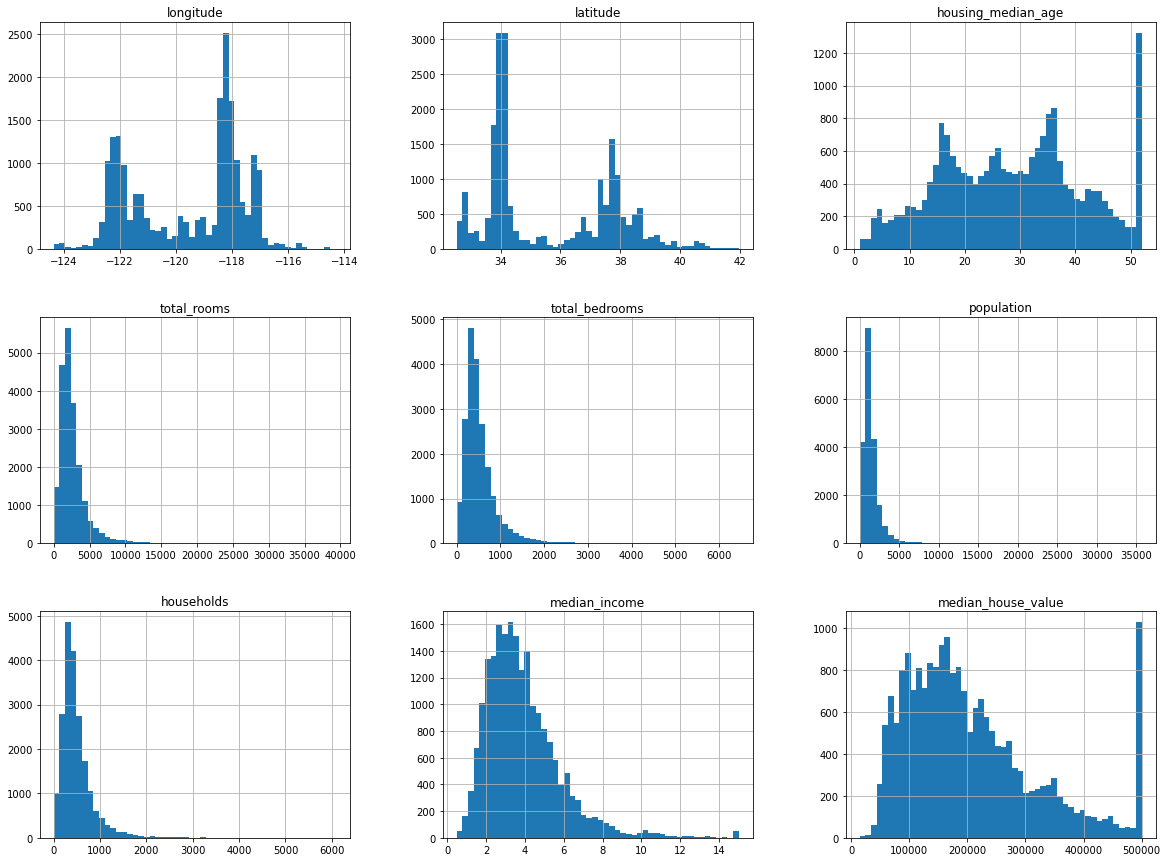

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show

In [8]:
import numpy as np
housing['income_cat'] = pd.cut (housing['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1,2,3,4,5])

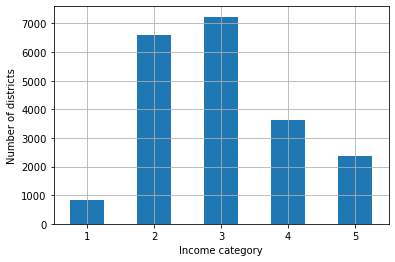

In [9]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Income category')
plt.ylabel('Number of districts')
plt.show()

In [10]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [11]:
housing.shape

(20640, 11)

In [12]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2,
    stratify=housing['income_cat'],random_state=42)

In [13]:
strat_train_set = strat_train_set.drop('income_cat', axis=1)
strat_test_set = strat_test_set.drop('income_cat', axis=1)

In [14]:
house = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

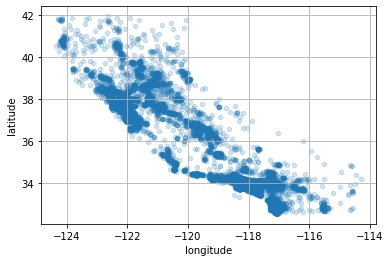

In [15]:
house.plot(kind='scatter', x = 'longitude', y = 'latitude', grid = True, alpha = 0.2)

In [18]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

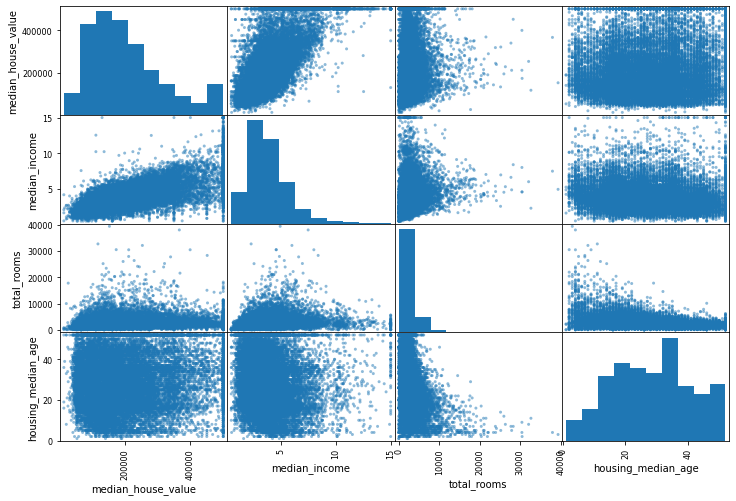

In [19]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize = (12, 8))
plt.show()

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
house_num = house.drop("ocean_proximity", axis=1)
imputer.fit(house_num)
house_num.median().values

array([-1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1195e+03,  4.3300e+02,
        1.1640e+03,  4.0800e+02,  3.5409e+00,  1.7950e+05])

In [22]:
x = imputer.transform(house_num)
house_tr = pd.DataFrame(x, columns=house_num.columns, index = house_num.index)

In [23]:
house_cat = house [["ocean_proximity"]]
house_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [25]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(house_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_tr = scaler.fit_transform(house_num)

In [30]:
house_tr_df = pd.DataFrame(housing_tr, columns= house_num.columns, index=house_num.index)
house_tr_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
17606,-1.156043,0.771950,0.743331,-0.493234,-0.445796,-0.636211,-0.420698,-0.614937,0.688068
18632,-1.176025,0.659695,-1.165317,-0.908967,-1.034621,-0.998331,-1.022227,1.336459,1.154794
14650,1.186849,-1.342183,0.186642,-0.313660,-0.155018,-0.433639,-0.093318,-0.532046,-0.087217
3230,-0.017068,0.313576,-0.290520,-0.362762,-0.397333,0.036041,-0.383436,-1.045566,-1.388864
3555,0.492474,-0.659299,-0.926736,1.856193,2.398979,2.724154,2.570975,-0.441437,0.410625
...,...,...,...,...,...,...,...,...,...
6563,0.722267,-0.673331,1.379547,-0.632123,-0.724458,-0.759010,-0.764049,0.554158,0.287029
12053,1.007011,-0.823004,0.902385,-0.667196,-0.583915,-0.329664,-0.636291,-0.948815,-0.812371
13908,1.586489,-0.724781,-1.562952,1.043901,0.816664,0.607904,0.713156,-0.316705,-0.943746
11159,0.782213,-0.851068,0.186642,-0.309919,-0.375525,-0.057178,-0.375451,0.098121,0.163433
